In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import load_medMNIST_data
from generative_pipeline import CustomGenerativePipeline
from custom_models.cvae import CVAE, VAELoss
from torch.utils.data import DataLoader
import torch.optim
import torch.nn as nn

In [3]:
dataloader, dataset = load_medMNIST_data()

MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/
Using downloaded and verified file: C:\Users\josem\.medmnist\bloodmnist.npz
Using downloaded and verified file: C:\Users\josem\.medmnist\bloodmnist.npz
Using downloaded and verified file: C:\Users\josem\.medmnist\bloodmnist.npz
Image size: torch.Size([3, 28, 28])
Label size: torch.Size([1])
Label values: {0, 1, 2, 3, 4, 5, 6, 7}


In [4]:
# get image size from the dataset
channels, dim_1, dim_2 = dataloader.dataset[0][0].shape

print(f"Channels: {channels}")
print(f"Dim 1: {dim_1}")
print(f"Dim 2: {dim_2}")

Channels: 3
Dim 1: 28
Dim 2: 28


In [5]:

# ********** Model * **********
model = CVAE(
    input_channels=channels,
    latent_dim=64,
    output_channels=channels,
)

# ********** Training parameters **********
loss_fn = VAELoss(kld_weight=0.75)
optimizer_class = torch.optim.Adam
lr = 1e-3
n_epochs = 100

model

CVAE(
  (encoder): ConvEncoder(
    (conv): Sequential(
      (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (3): ReLU()
      (4): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (dense_mu): Linear(in_features=1152, out_features=64, bias=True)
    (dense_logvar): Linear(in_features=1152, out_features=64, bias=True)
  )
  (decoder): ConvDecoder(
    (dense): Linear(in_features=64, out_features=1152, bias=True)
    (deconv): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (3): ReLU()
      (4): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (5): ReLU()
      (6): ConvTranspose2d(3, 3, 

In [6]:
pipeline = CustomGenerativePipeline(
    model=model,
    criterion=loss_fn,
    optimizer_class=optimizer_class,
    optimizer_params={"lr": lr},
    train_dataloader=dataloader,
    train_dataset=dataset,
    n_epochs=n_epochs,
)
pipeline.execute()

Using device: cuda
Epoch 1/100, Loss: 175649.7017
Epoch 2/100, Loss: 161877.7598
Epoch 3/100, Loss: 158821.1601
Epoch 4/100, Loss: 157207.8750
Epoch 5/100, Loss: 155832.7135
Epoch 6/100, Loss: 155006.4295
Epoch 7/100, Loss: 154549.9486
Epoch 8/100, Loss: 154300.9502
Epoch 9/100, Loss: 154121.3577
Epoch 10/100, Loss: 153988.7043
Epoch 11/100, Loss: 153863.9702
Epoch 12/100, Loss: 153774.7471
Epoch 13/100, Loss: 153753.7008
Epoch 14/100, Loss: 153628.1789
Epoch 15/100, Loss: 153588.5320
Epoch 16/100, Loss: 153537.6706
Epoch 17/100, Loss: 153493.3427
Epoch 18/100, Loss: 153453.0502
Epoch 19/100, Loss: 153404.4585
Epoch 20/100, Loss: 153380.2934
Epoch 21/100, Loss: 153342.6212
Epoch 22/100, Loss: 153298.4453
Epoch 23/100, Loss: 153290.4134
Epoch 24/100, Loss: 153242.4756
Epoch 25/100, Loss: 153224.6007
Epoch 26/100, Loss: 153177.6247
Epoch 27/100, Loss: 153192.0057
Epoch 28/100, Loss: 153135.7784
Epoch 29/100, Loss: 153133.4370
Epoch 30/100, Loss: 153103.8888
Epoch 31/100, Loss: 153076.237

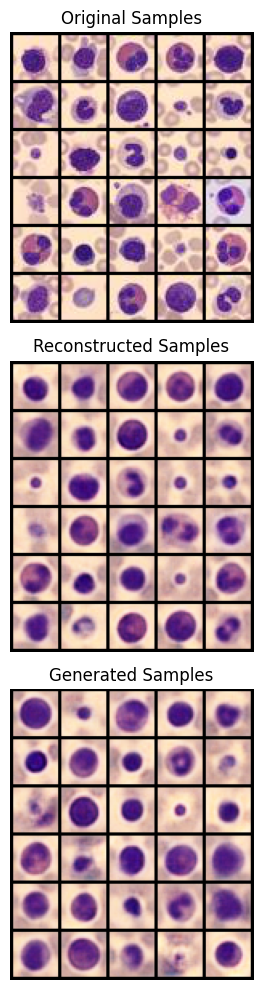

In [8]:
pipeline.visualize(30)
#pipeline.evaluate()

In [12]:
synthetic_samples = pipeline.model.generate_synthetic_samples(
    n_to_generate=49,
    device="cuda",
    batch_size=16,
)

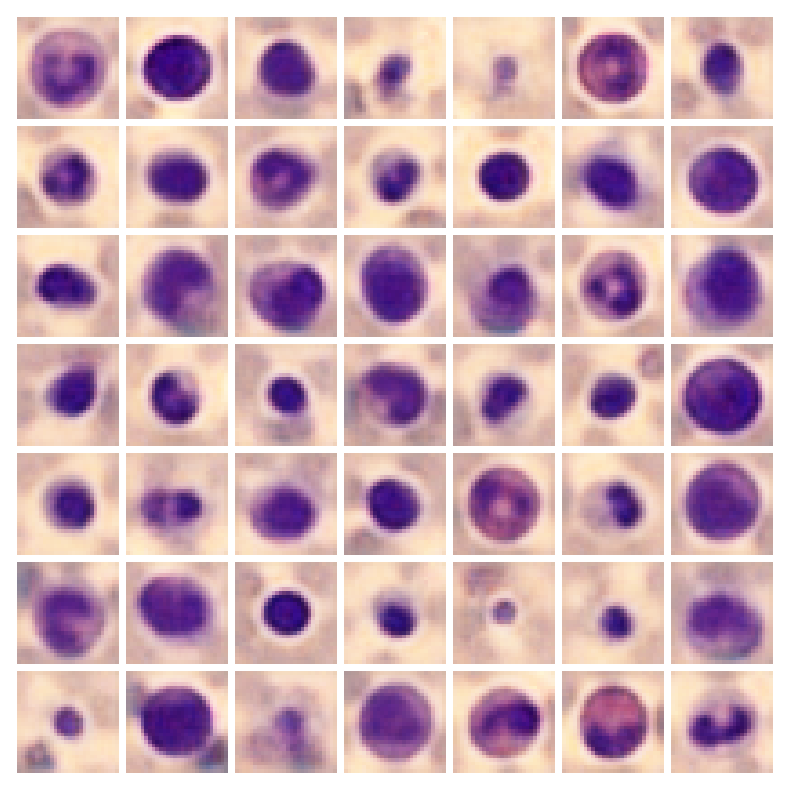

In [13]:
# display generated images
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# Function to display generated images
def show_generated_images(images):

    
    # Create a grid with WHITE padding (pad_value=1.0)
    grid = vutils.make_grid(images, nrow=7, padding=2, normalize=True, pad_value=1.0)
    
    # Display the image
    plt.figure(figsize=(8,8))
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.axis('off')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Show exactly 25 newly generated images with white padding
show_generated_images(synthetic_samples)